<a href="https://colab.research.google.com/github/francobarrionuevoenv21/MHW_xarray_mapping/blob/main/nbks_examples/exampleMHW_Anim_Urg-Brz17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Notebook description**
### **Create MHW animation**
---
This notebook shows a usage example of the MHW XArray Mapping module to create an _animation map_ of ocean warming events intensity using the methodology defined by [Hobday et al. (2016)](https://www.sciencedirect.com/science/article/abs/pii/S0079661116000057). Input data must be Sea Surface Temperature (SST) with a daily temporal resolution. For further information check the GitHub repo documentation.

This notebook works with example data for the Uruguay-Brazil coast region provided in the GitHub repo.

In [ ]:
# Clone GitHub repo
!git clone https://github.com/francobarrionuevoenv21/MHW_xarray_mapping.git

# Add the module path to use it as a Python package
import sys
sys.path.append("/content/MHW_xarray_mapping")

# Install Cartopy if necessary
#pip install cartopy

In [7]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime as dt
from datetime import timedelta
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Import MHW mapping module
from mhwxamap.mhwMap import mapIntensityCont as micn

In [29]:
# Define main parameters
## NOTE: For further details about other parameters check documentation in the repo
PATH_SST = "/content/MHW_xarray_mapping/data_example/oisst_1983-2018_TestSubset.nc" ## Define SST data path

## NOTE: Must define MHW start and end date for animation
MHW_START = "2017-02-15"
MHW_END = "2017-03-30"

In [30]:
# Get a list of dates withing the MHW time lapse
dt_start = dt.strptime(MHW_START, "%Y-%m-%d")
dt_end = dt.strptime(MHW_END, "%Y-%m-%d")

list_dates = []

dt_mov = dt_start

for i in range((dt_end - dt_start).days + 1):
  list_dates.append(dt_mov.strftime("%Y-%m-%d"))
  dt_mov = dt_mov + timedelta(days=1)

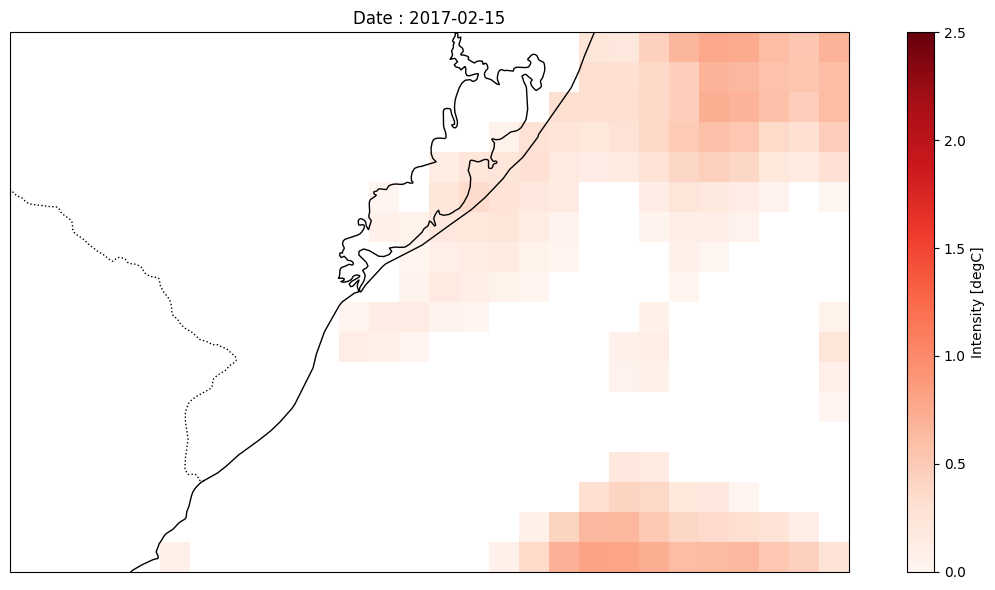

In [32]:
# Create animation of the ocean warming intensity for the MHW period
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

## Set initial frame
da0 = micn(PATH_SST, list_dates[0]) # It can be changed to categorized and viceversa
img = da0.plot(
    ax=ax,
    vmin=0,
    vmax=2.5,
    cmap="Reds",
    add_colorbar=True
)

## Add coastlines and countries borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

## Define a function to update frames
def update(frame):
    da = micn(PATH_SST, list_dates[frame]) # It can be changed to categorized and viceversa
    img.set_array(da.values.flatten()) # Update image data
    ax.set_title(f"Date : {list_dates[frame]}")
    return img,

## Create animation
ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(list_dates),
    interval=200
)

fig.tight_layout()

## Save animation
ani.save("MHW_anim.gif",
  writer="ffmpeg",
  dpi=150)

In [24]:
ani.